# EDA (Flight Fare dataset)
## Shubham Verma

**Follow Me on Linkedin:**  https://lnkd.in/gPxctEja

**Follow Me on GitHub** https://lnkd.in/gky-wyFJ


### EDA
1. Data Profiling
2. Stastical analysis
3. Graphical Analysis

**Dataset:** My GitHub EDA repository

## 1.0 Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# To display maximum columns of dataframe on screen
pd.pandas.set_option('display.max_columns', None)

## 2.0 Importing Dataset and Basic Info about dataset

In [2]:
dataset=pd.read_excel('Data_Train.xlsx')
dataset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
dataset.shape

(10683, 11)

### 2.1 Checking datatypes and null values

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
dataset.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

### Observation
1. There are total 11 features and 10683 records.
2. There are 4 datetime columns but there datatype is object.
3. There are 6 categorical columns.
4. The dependent feature is Integer datatype and its name is Price. 
5. Only two features have missing values, that can be dropped.

In [6]:
### Creating copy of dataset for data cleaning.
data=dataset.copy()
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [7]:
### dropping null values
### Now there is no null values in copied dataset.
data.dropna(inplace=True)

### 2.2 Checking individual categories in each Categorical feature

In [8]:
### checking individual categories in each feature
for feature in [features for features in dataset.columns if features not in ['Date_of_Journey', 'Price', 'Arrival_Time','Dep_Time','Route']]:
    print(dataset[feature].value_counts())

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64
Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64
2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64
1 stop   

### Observations
1. There are 9 Service Provider companies namely `IndiGo`, `Air India`, `Jet Airways`, `SpiceJet`, `Multiple carriers`, `GoAir`, `Vistara`, `Air Asia`, `Trujet`.
2. Vistara Premium economy, Jet Airways Business and Multiple carriers Premium economy are special services given by these companies.
3. The dataset has 5 Source airports namely `Banglore`, `Kolkata`, `Delhi`,`Chennai` and `Mumbai`.
4. The dataset has 6 Destination airports namely `New Delhi`, `Banglore`, `Cochin`, `Kolkata`, `Delhi` and `Hyderabad`.
5. There is total 5 different types of stops namely `non-stop, 1 stop, 2 stops, 3 stops and 4 stops`. 
6. There is total 10 different categories in additional info namely `No info, In-flight meal not included, No check-in baggage included, 1 Short layover, No Info, 1 Long layover, Change airports, Business class, Red-eye flight and  2 Long layover`.

### 2.3 Data Cleaning 

In [9]:
### converting Date_of_journey to datetime and extracting day, month.
### since data is of single year hence not extracting year from date

data['day_of_journey']=pd.to_datetime(data['Date_of_Journey'], format='%d/%m/%Y').dt.day
data['month_of_journey']=pd.to_datetime(data['Date_of_Journey'], format='%d/%m/%Y').dt.month

In [10]:
### droping original date of journey column

data.drop(['Date_of_Journey'], axis=1, inplace=True)

In [11]:
### converting Dep_Time to datetime and extracting Dep_hour and Dep_min

data['dep_hr']=pd.to_datetime(data['Dep_Time']).dt.hour
data['dep_min']=pd.to_datetime(data['Dep_Time']).dt.minute

In [12]:
### dropping Dep_time Column

data.drop(['Dep_Time'], axis=1, inplace=True)

In [13]:
### Converting Arrival_Time to datetime and extraction Arrival_hr and Arrival_min

data['Arrival_hr']=pd.to_datetime(data['Arrival_Time']).dt.hour
data['Arrival_min']=pd.to_datetime(data['Arrival_Time']).dt.minute

In [14]:
### dropping Arrival_Time Column

data.drop(['Arrival_Time'], axis=1, inplace=True)

In [15]:
### replacing h and m with nothing in duration column

data['Duration']=data['Duration'].str.replace('h',"")
data['Duration']=data['Duration'].str.replace('m',"")

In [16]:
### creating Duration_hr and Duration_min column bu splitting duration column
data[['Duration_hr','Duration_min']] = data.Duration.str.split(" ",expand=True)

In [17]:
### replacing None values in mins column with zero
data.Duration_min.fillna(0, inplace=True)

In [18]:
### changing dataype from object to float
data['Duration_hr']=data['Duration_hr'].astype('float64')
data['Duration_min']=data['Duration_min'].astype('float64')

In [19]:
### calculationg total duration in hrs
data['Total_duration']=round(data['Duration_hr']+(data['Duration_min']/60),2)

In [20]:
### dropping Duration_hr and Duration_min feature
data.drop(['Duration_hr', 'Duration_min'], axis=1, inplace=True)

In [21]:
### dropping Duration column
data.drop(['Duration'], axis=1, inplace=True)

In [22]:
data['Total_Stops']=data['Total_Stops'].replace('non-stop','0')
data[['Total_Stops', 'drop_this']]=data.Total_Stops.str.split(" ", expand=True)

In [23]:
data['Total_Stops']=data['Total_Stops'].astype('int64')

In [24]:
data.drop('drop_this', axis=1, inplace=True)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Airline           10682 non-null  object 
 1   Source            10682 non-null  object 
 2   Destination       10682 non-null  object 
 3   Route             10682 non-null  object 
 4   Total_Stops       10682 non-null  int64  
 5   Additional_Info   10682 non-null  object 
 6   Price             10682 non-null  int64  
 7   day_of_journey    10682 non-null  int64  
 8   month_of_journey  10682 non-null  int64  
 9   dep_hr            10682 non-null  int64  
 10  dep_min           10682 non-null  int64  
 11  Arrival_hr        10682 non-null  int64  
 12  Arrival_min       10682 non-null  int64  
 13  Total_duration    10682 non-null  float64
dtypes: float64(1), int64(8), object(5)
memory usage: 1.2+ MB


### Observations
1. We have 5 categorical features.
2. we have 9 numerical features

## 3.0 Categorical Features

### 3.1 Separating categorical features and listing count of  unique categories in each feature

In [26]:
categorical_features=[feature for feature in data.columns if data[feature].dtypes == 'O']
print("There are {} categorical features namely {}".format(len(categorical_features), categorical_features))

There are 5 categorical features namely ['Airline', 'Source', 'Destination', 'Route', 'Additional_Info']


In [27]:
### unique categories in each categorical feature
for feature in categorical_features:
    print("The feature '{}' has '{}' number of unique categories.".format(feature, data[feature].nunique()))

The feature 'Airline' has '12' number of unique categories.
The feature 'Source' has '5' number of unique categories.
The feature 'Destination' has '6' number of unique categories.
The feature 'Route' has '128' number of unique categories.
The feature 'Additional_Info' has '10' number of unique categories.


### 3.2 Count of observations in each categories of categorical features

In [28]:
### Grouping Routes which are less than 1 percent of total Routes to other category for better visualisation of Route Feature
frequencies=data['Route'].value_counts(normalize=True)
mapping=data['Route'].map(frequencies)
data['Route']=data['Route'].mask(mapping<0.01, 'other_')
data['Route'].value_counts()

DEL → BOM → COK          2376
other_                   1720
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
CCU → DEL → BLR           565
BLR → BOM → DEL           402
MAA → CCU                 381
DEL → HYD → COK           326
DEL → JAI → BOM → COK     240
DEL → BLR → COK           232
DEL → COK                 213
DEL → AMD → BOM → COK     205
DEL → MAA → COK           146
Name: Route, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'BLR → DEL'),
  Text(1, 0, 'other_'),
  Text(2, 0, 'CCU → BLR'),
  Text(3, 0, 'BLR → BOM → DEL'),
  Text(4, 0, 'DEL → BOM → COK'),
  Text(5, 0, 'DEL → BLR → COK'),
  Text(6, 0, 'MAA → CCU'),
  Text(7, 0, 'CCU → BOM → BLR'),
  Text(8, 0, 'DEL → AMD → BOM → COK'),
  Text(9, 0, 'DEL → HYD → COK'),
  Text(10, 0, 'DEL → COK'),
  Text(11, 0, 'CCU → DEL → BLR'),
  Text(12, 0, 'DEL → MAA → COK'),
  Text(13, 0, 'BOM → HYD'),
  Text(14, 0, 'DEL → JAI → BOM → COK')])

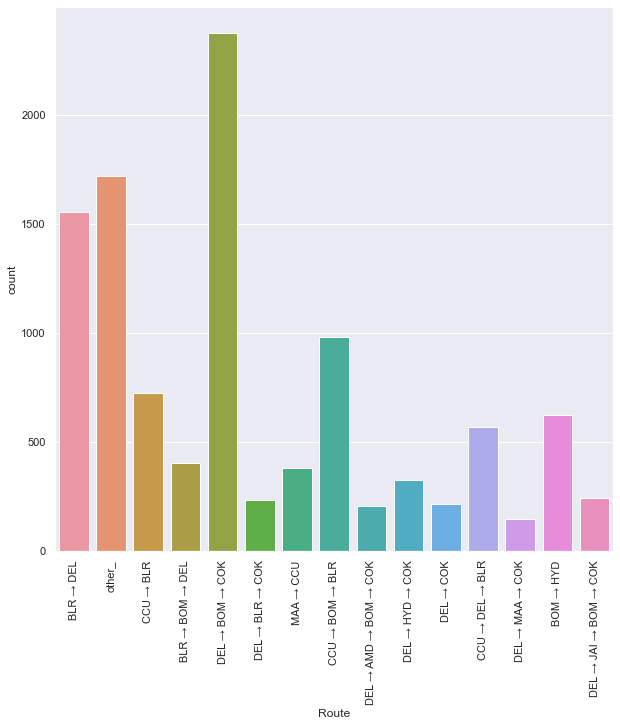

In [44]:
### Visualising Route feature saperately
sns.set(rc={'figure.figsize':(10,10)})
sns.countplot(data=data, x=data['Route'])
plt.xticks(rotation=90)

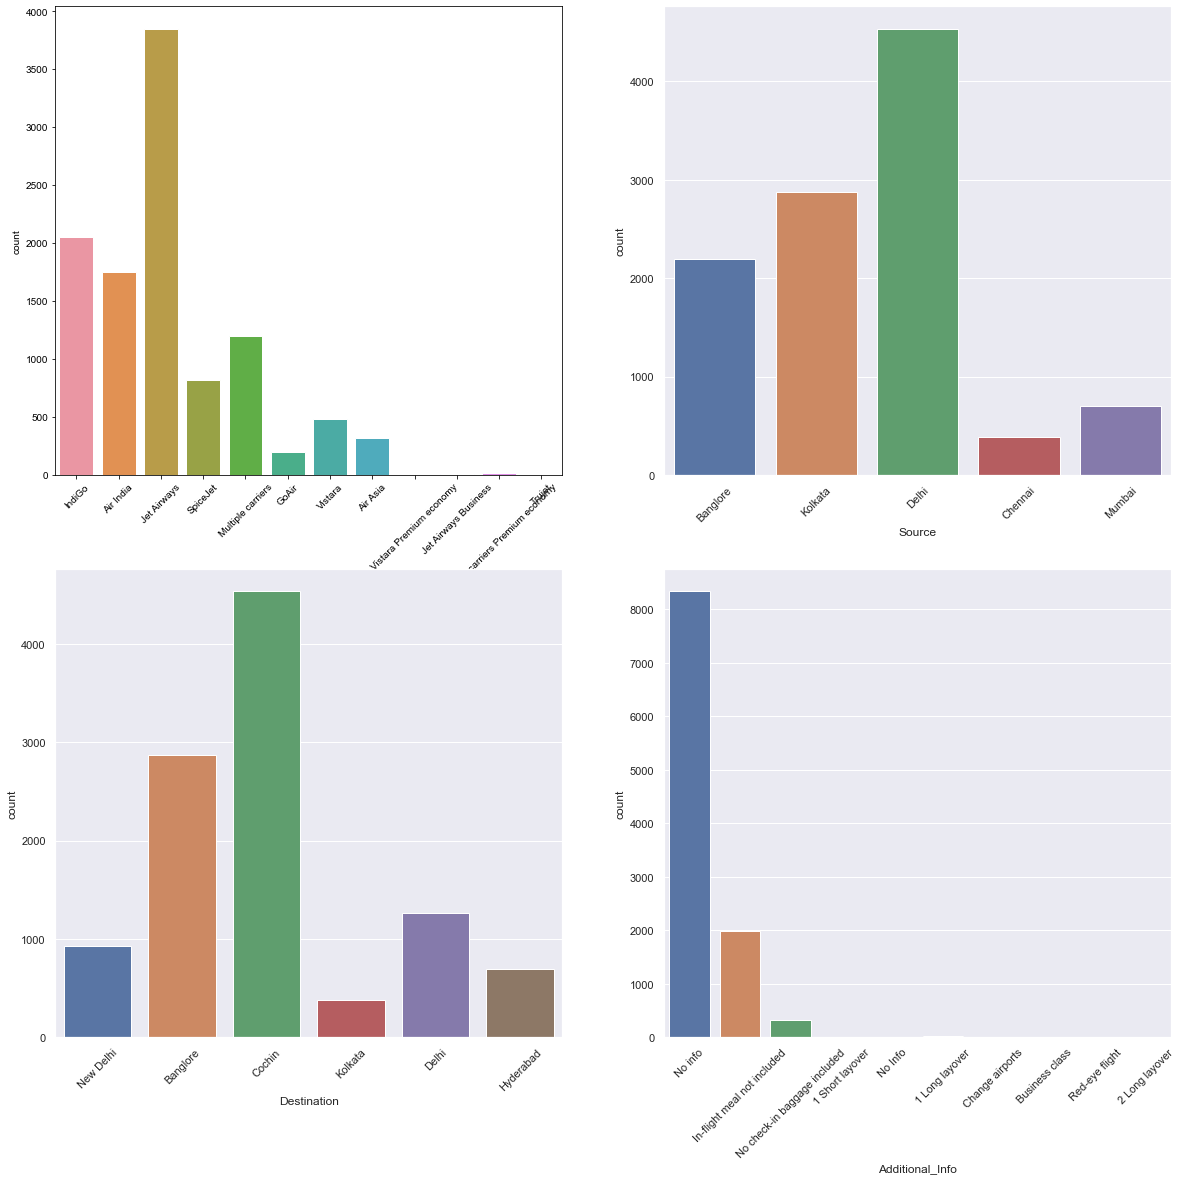

In [30]:
### excluding routes as it has more than 120 categories

plt.figure(figsize=(20,50))
for i in enumerate([feature for feature in categorical_features if feature !='Route']):
    plt.subplot(5, 2, i[0]+1)
    sns.set(rc={'figure.figsize':(10,10)})
    sns.countplot(data=data, x=i[1])
    plt.xticks(rotation=45)

### Observations
1. `DEL → BOM → COK` is the most busiest route among all routes.
2. `BLR → DEL` is second and `CCU → BOM → BLR` is third most busiest route.
3. `DEL → MAA → COK` is least busiest route.
4. `Jet Airways` have maximum number of flights followed by `indigo and Air India`.
5. `Trujet` has least no of flights.
6. `Delhi` has highest outgoing traffic of flights followed by `kolkata and banglore`.
7. `Chennai` has least outgoing traffic of flights.
8. `Cochin` has highest incoming traffic of flights followed by `banglore and Delhi`.
9. `Kolkata` has least incoming traffic of flights.
10. More than `8000 flights have no additional info`.
11. `Additional info` feature only has two categories with `significant no of observations` namely `in-flight meal not included and no check-in baggage included`.

### 3.3 Comparing each Categorical feature with Price

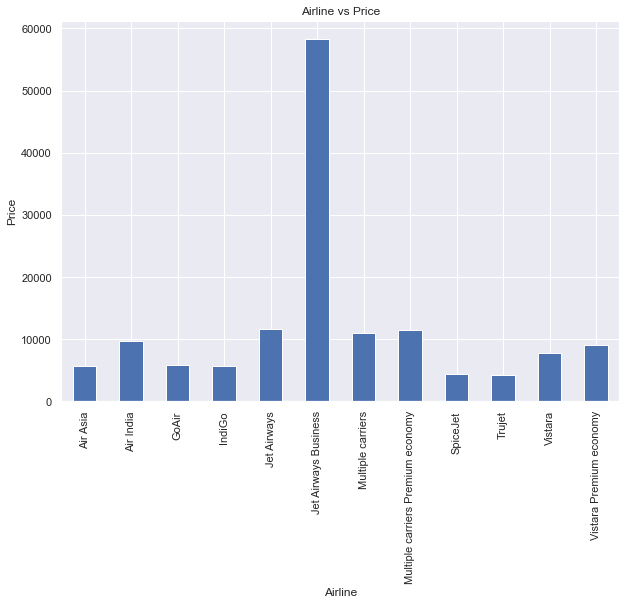

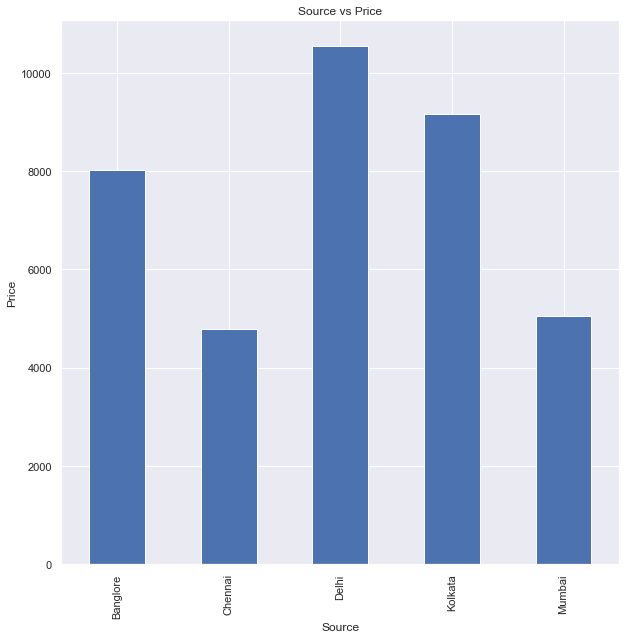

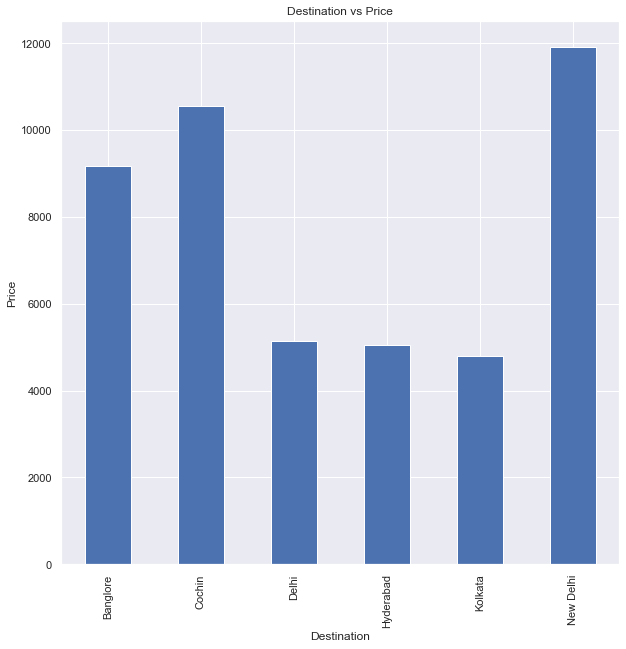

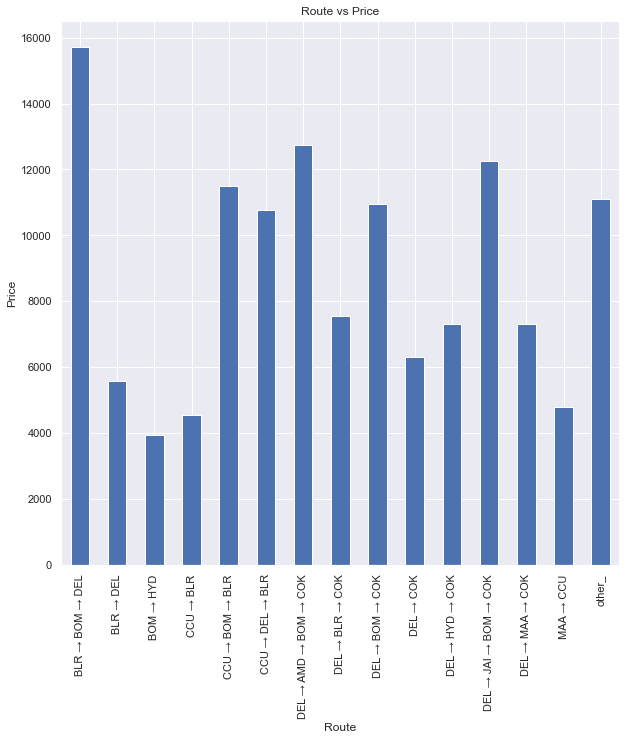

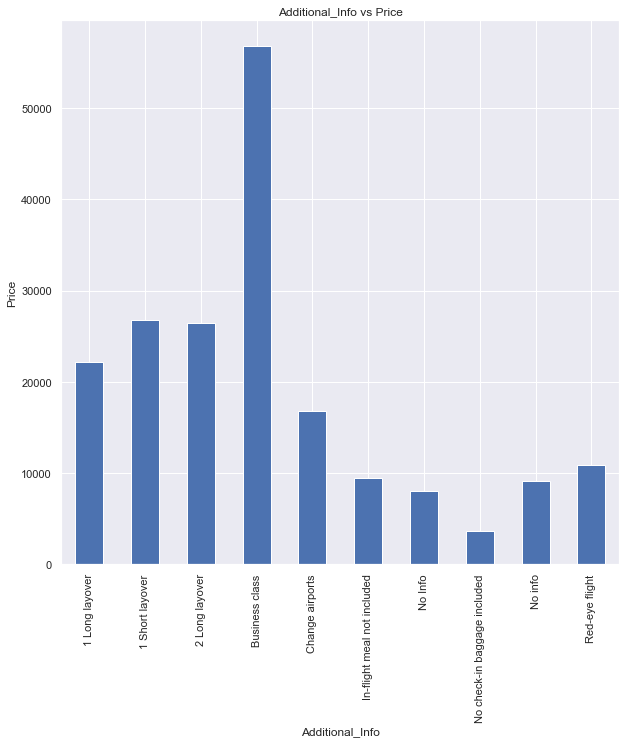

In [31]:
plt.figure(figsize=(10,7))
for feature in categorical_features:
    data.groupby(feature)['Price'].mean().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.xticks(rotation=90)
    plt.title("{} vs Price".format(feature))
    plt.show();

### Observations
1. `Jet Airways Business` has highest average flight prices but since no of observations are less, hence it can be treated as outlier.
2. `Jet Airways`, `Multiple carriers`, `Multiple carriers Premium economy`, `Air India`, `Vistara Premium economy` have an average flight prices around Rs.10,000 
3. `Air Asia`, `GoAir`, `IndiGo` has an average flight prices between 6000 to 7000 INR.
4. `SpiceJet` and `Trujet` has least average flight prices among all service providers.
5. `Multiple carriers Premium economy`, `Jet Airways Business`, `Vistara Premium economy`, `Trujet` has very less no of flights. So these can be dropped.
6. `Delhi` has the highest average flight prices followed by `Kolkata` and `banglore` for flights having source in these cities. 
7. `Chennai` and `Mumbai` has the least average flight prices for flights having source in these cities. 
8. `New Delhi` has the highest average flight prices followed by `Cochin` and `banglore` for flights having destination in these cities. 
9. `Delhi`, `Hyderabad` and `Kolkata` has the least average flight prices for flights having destination in these cities. 
10. `BLR-BOM-DEL` route has highest average flight price whereas `BOM-HYD` route has least average flight price.
11. Flights with `Business Class` has highest average flight price.
12. Flights with `long` and `short layover` has second highest average flight price.

### 3.4 Categorical feature vs outliers in Price

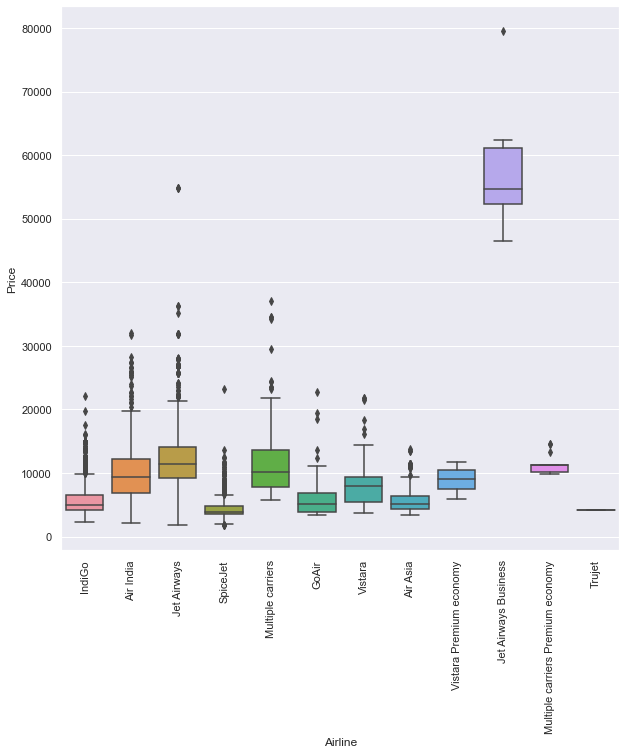

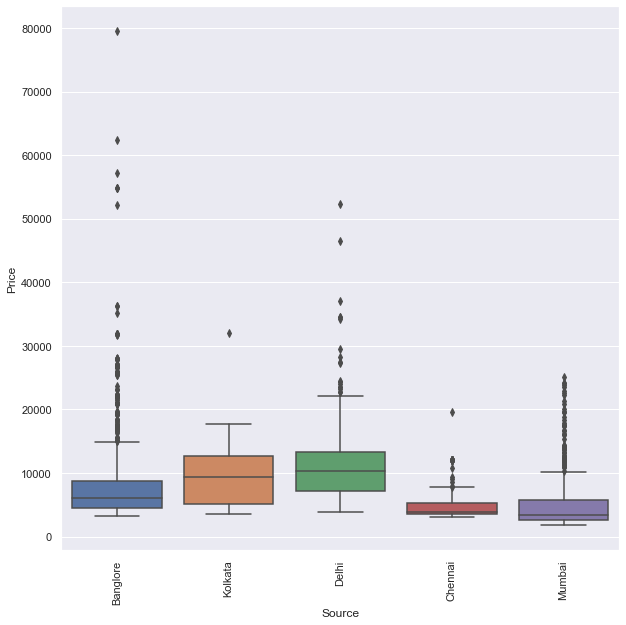

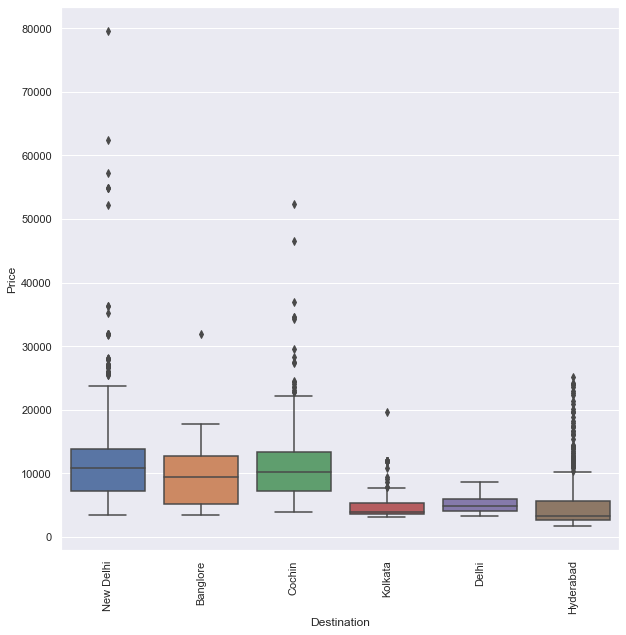

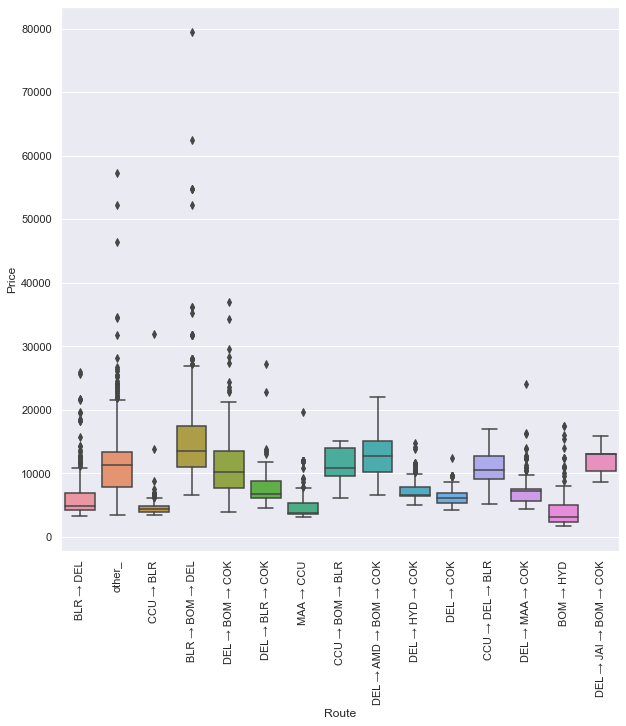

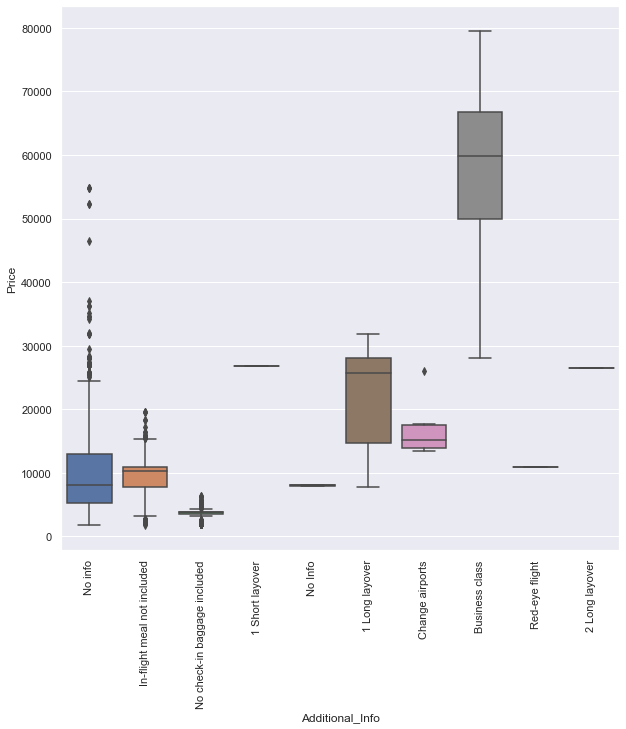

In [32]:
for feature in categorical_features: 
    sns.set(rc={'figure.figsize':(10,10)})
    sns.boxplot(x=data[feature],y='Price',data=data.sort_values('Price',ascending=False))
    plt.xticks(rotation=90)
    plt.show()

### Observations
1. `IndiGo`, `Air India`, `Jet Airways`, and `SpiceJet` has large no. of outliers in flight prices.
2. `Multiple carriers`, `GoAir`, `Vistara` has comparatively less no. of outliers in flight prices.
3. Source of flight cities `banglore, delhi, chennai and mumbai` has large no. of outliers in flight prices whereas `kolkata` has least no. of outliers in flight prices.
4. Destination of flight cities `new delhi, cochin, hyderabad and kolkata` has large no. of outliers in flight prices whereas `banglore and delhi` has least no. of outliers in flight prices.
5. `BOM → HYD, DEL → MAA → COK, DEL → BOM → COK, BLR → BOM → DEL, and BLR → DEL` routes has large no. of outliers in flight prices whereas `DEL → AMD → BOM → COK, MAA → CCU, DEL → JAI → BOM → COK, and CCU → DEL → BLR` has zero  no. of outliers in flight prices.
6. Additional info categories `No check-in baggage included, No info, and In-flight meal not included`has large no. of outliers in flight prices whereas `Business class and 1 Long layover` has zero  no. of outliers in flight prices.

## 4.0 Numerical Features

### 4.1 Numerical features and unique values

In [33]:
numerical_features=[feature for feature in data.columns if data[feature].dtypes!='O']
print("There are {} no of numerical features namely {}".format(len(numerical_features), numerical_features))

There are 9 no of numerical features namely ['Total_Stops', 'Price', 'day_of_journey', 'month_of_journey', 'dep_hr', 'dep_min', 'Arrival_hr', 'Arrival_min', 'Total_duration']


In [34]:
for feature in numerical_features:
    print("There are {} unique values in {} feature".format(data[feature].nunique(), feature))

There are 5 unique values in Total_Stops feature
There are 1870 unique values in Price feature
There are 10 unique values in day_of_journey feature
There are 4 unique values in month_of_journey feature
There are 24 unique values in dep_hr feature
There are 12 unique values in dep_min feature
There are 24 unique values in Arrival_hr feature
There are 12 unique values in Arrival_min feature
There are 367 unique values in Total_duration feature


### 4.2 Discreate features and its unique values

In [35]:
### discreate features (the features having less than 25 distinct/unique values is considered)

discreate_features=[feature for feature in numerical_features if data[feature].nunique()<25]
for feature in discreate_features:
    print("No. of unique categories in {} are {} namely {}".format(feature, data[feature].nunique(), 
                                                                   sorted(data[feature].unique())))

No. of unique categories in Total_Stops are 5 namely [0, 1, 2, 3, 4]
No. of unique categories in day_of_journey are 10 namely [1, 3, 6, 9, 12, 15, 18, 21, 24, 27]
No. of unique categories in month_of_journey are 4 namely [3, 4, 5, 6]
No. of unique categories in dep_hr are 24 namely [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
No. of unique categories in dep_min are 12 namely [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55]
No. of unique categories in Arrival_hr are 24 namely [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
No. of unique categories in Arrival_min are 12 namely [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55]


### 4.3 Continuous features

In [36]:
### continuous features
continuous_feature=[feature for feature in numerical_features if feature not in discreate_features]
print("There are {} no of Continuous features namely {}".format(len(continuous_feature), continuous_feature))

There are 2 no of Continuous features namely ['Price', 'Total_duration']


### 4.4 Visualising discrete features

### 4.4.1 Count of distinct values for each discrete feature

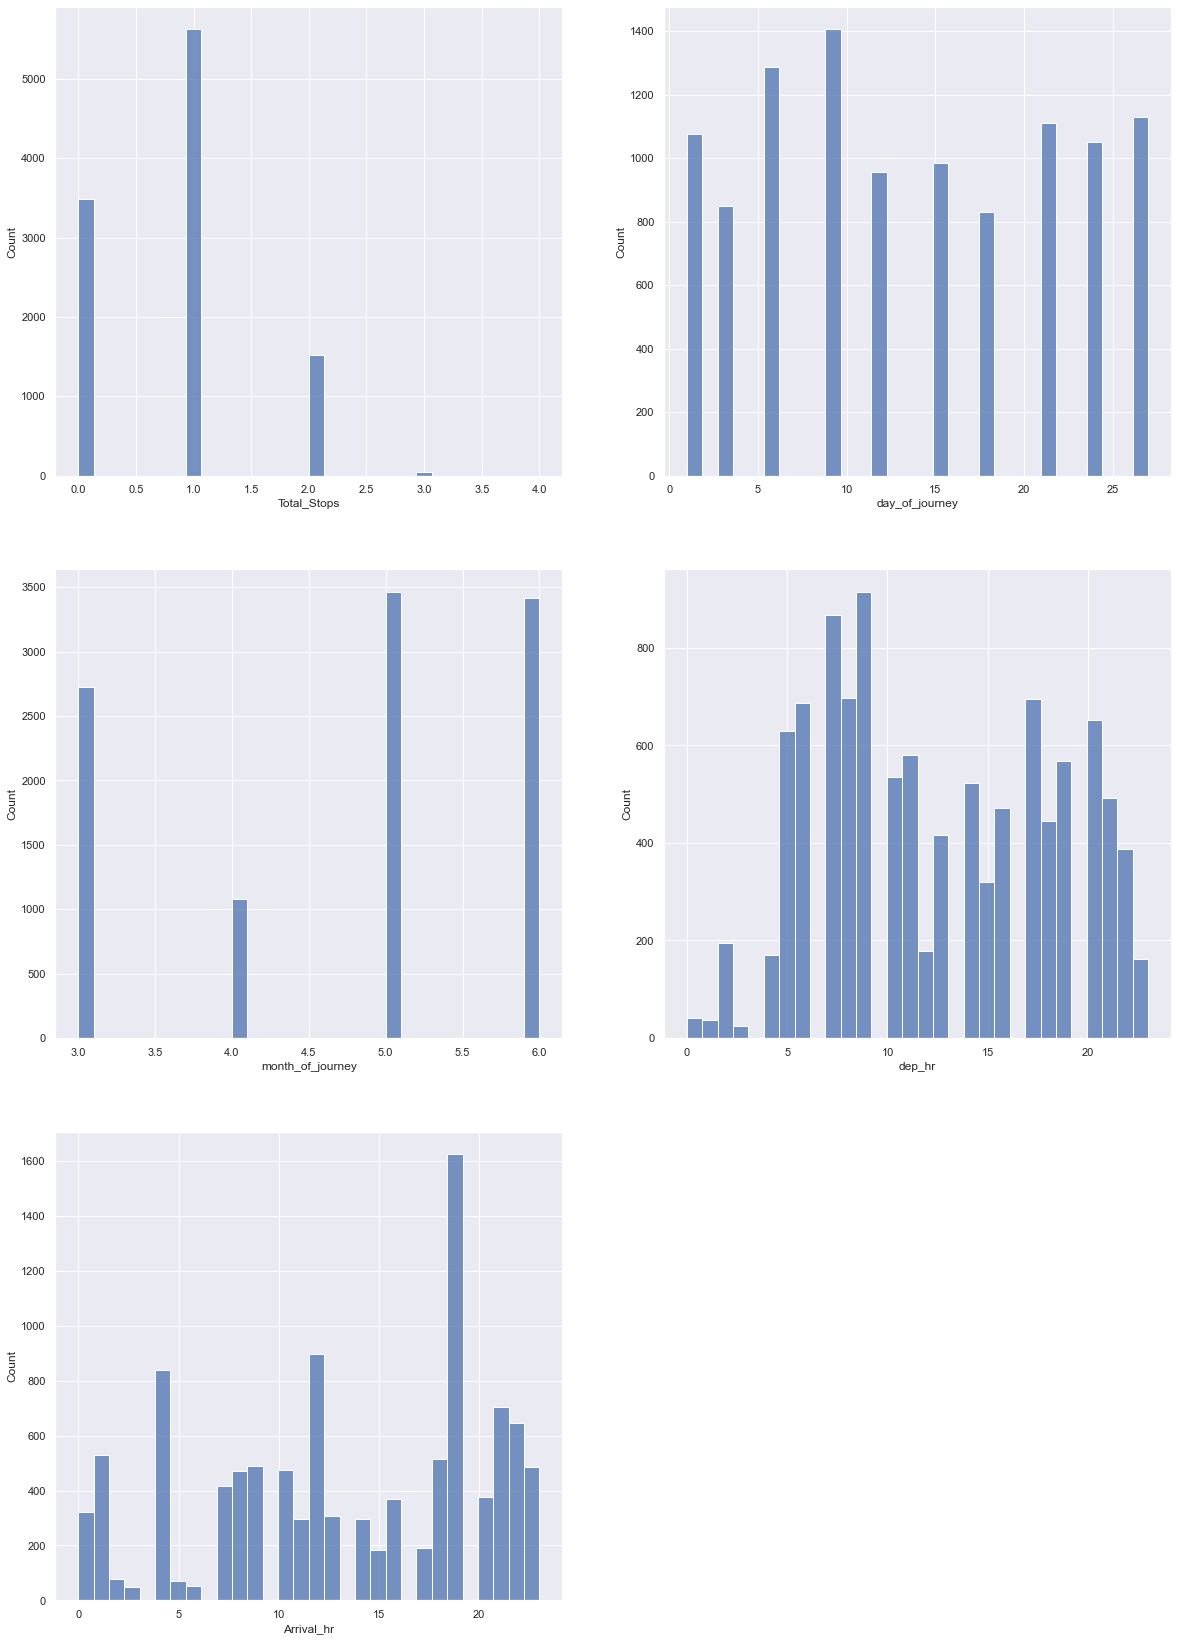

In [37]:
### discreate features excluding dep_min and Arrival_min as these feature seprately has no significance.


plt.figure(figsize=(20,50))
for i in enumerate([feature for feature in discreate_features if feature not in ['dep_min', 'Arrival_min']]):
    plt.subplot(5, 2, i[0]+1)
    sns.set(rc={'figure.figsize':(10,10)})
    sns.histplot(data=data, x=i[1], bins=30)
    plt.xlabel(i[1])

### Observations
1. Maximum flights have `1 stop` between source and destination airport followed by `no-stop and 2 stops`.
2. `4 stops` between source and destination airport has least no. of flights
3. All days of month have almost same no. of flights.
4. `May and June` have highest no. of flights followed by `March`.
5. `April` has least no. of flights.
6.` Morning 6 AM to 10 AM` and `Evening 5 PM to 8 PM` has more traffic of outgoing flights. 
7. `6 PM `has highest no. of incoming of flights whereas `4 AM `has least no. of incoming flights.

### 4.4.2 Comparing Prices of each Airline with each discrete feature

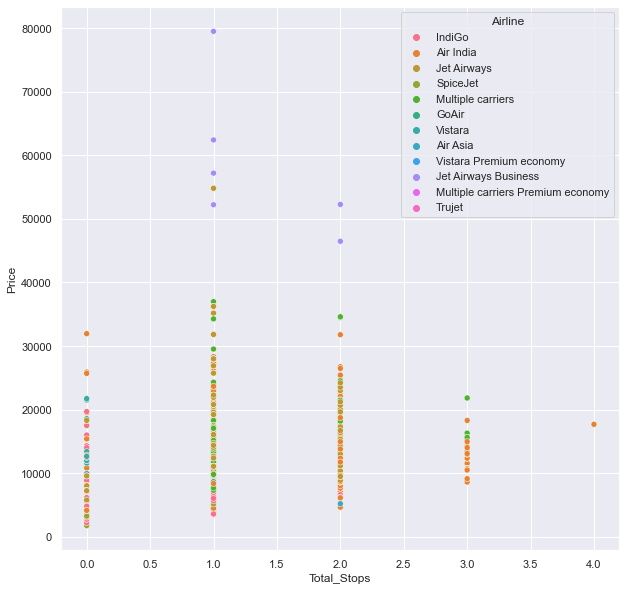

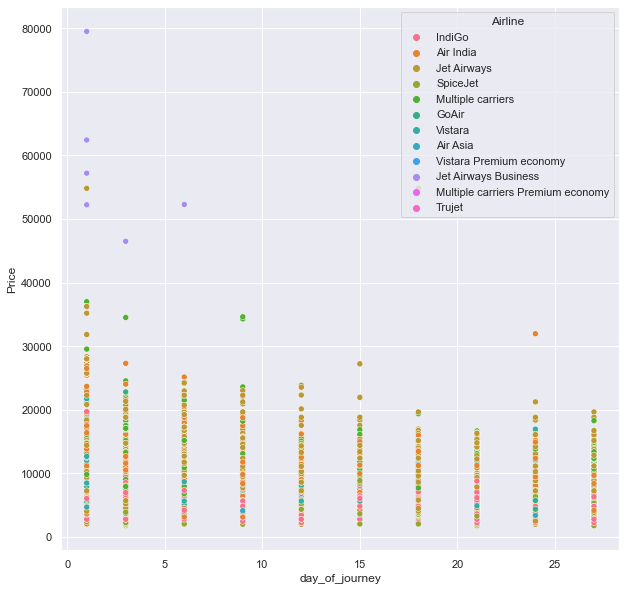

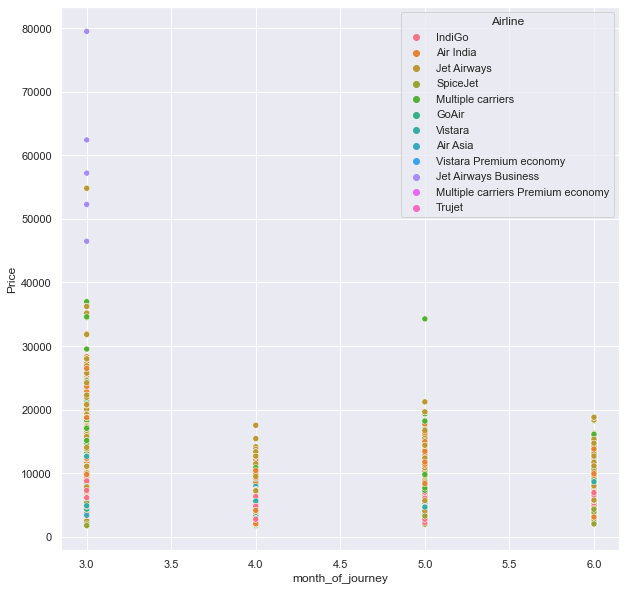

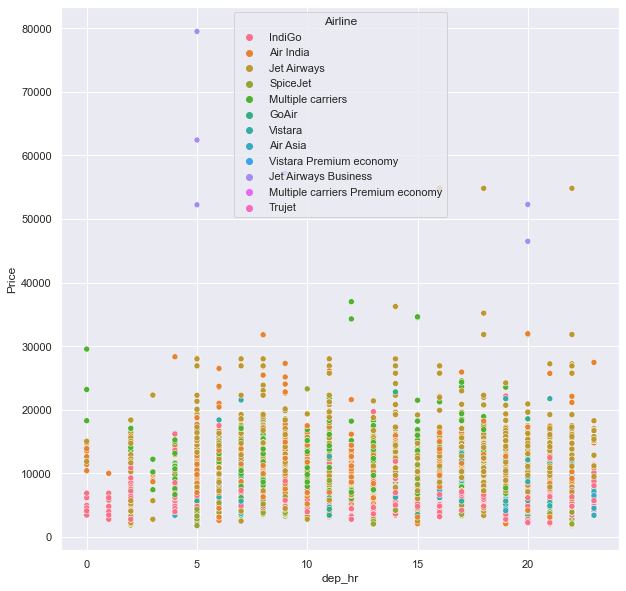

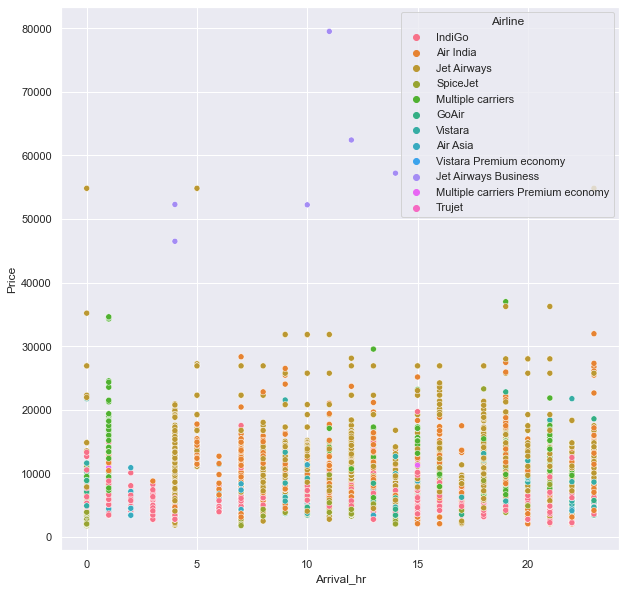

In [38]:
for feature in [feature for feature in discreate_features if feature not in ['dep_min', 'Arrival_min']]:
    sns.scatterplot(data=data, x=data[feature], y=data['Price'], hue=data['Airline'])
    plt.show()


### Observations
1. All flights with `0,1,2,3, and 4 Stops` have price less than `30,000 INR` with exception being `Jet airways and Jet airways Business 1 and 2 stops`.
2. `1st of month` have Highest flight price and rest all days have almost similar range of flight price.
3. Month of `March` has highest flight prices, rest all months have similar flight prices with max being `30,000 INR`.
4. All Departure hour have similar flight price ranges with outliers in flight prices.
5. All Arrival hour have similar flight price ranges with outliers in flight prices.

### 4.4.3 Comparing Prices of flight with each discrete feature

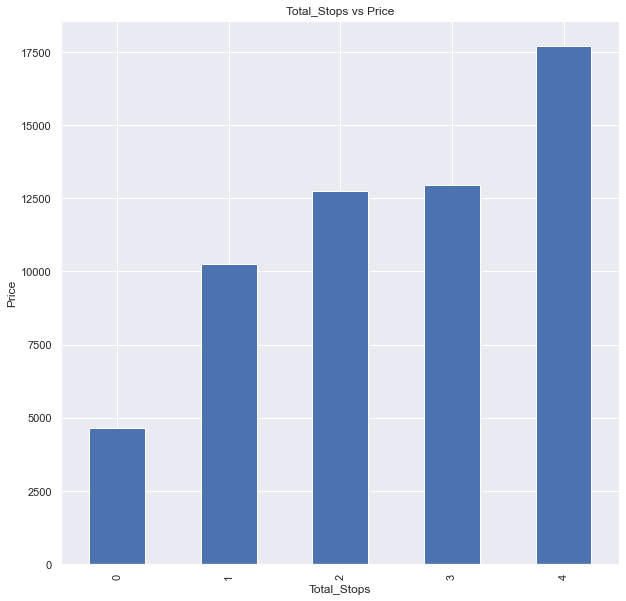

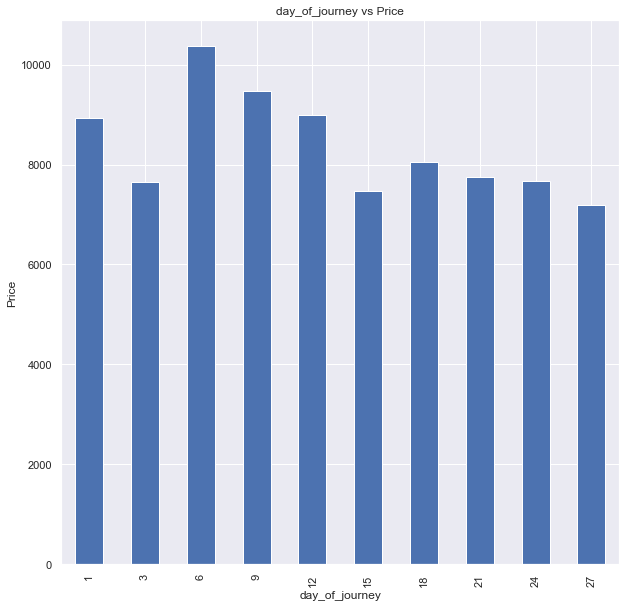

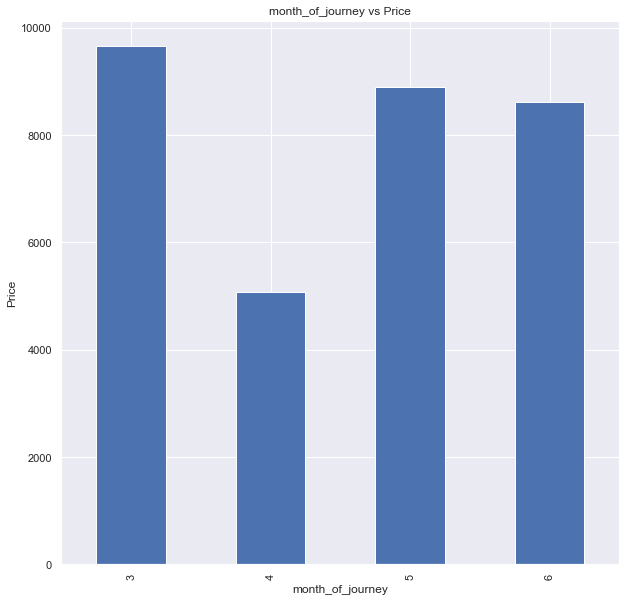

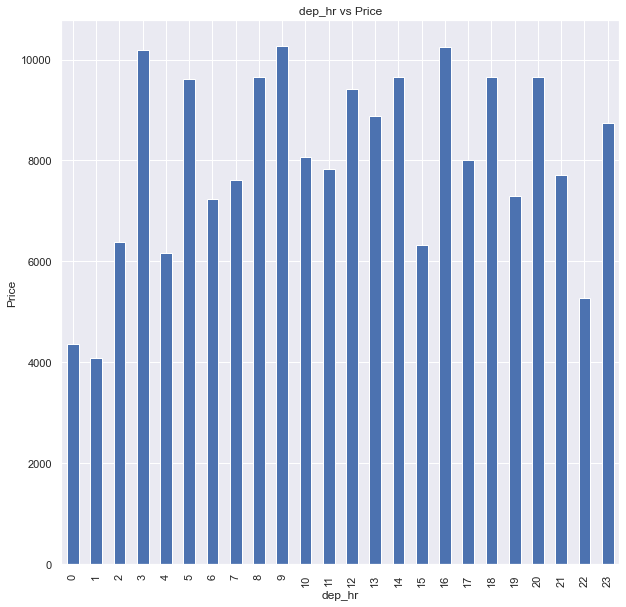

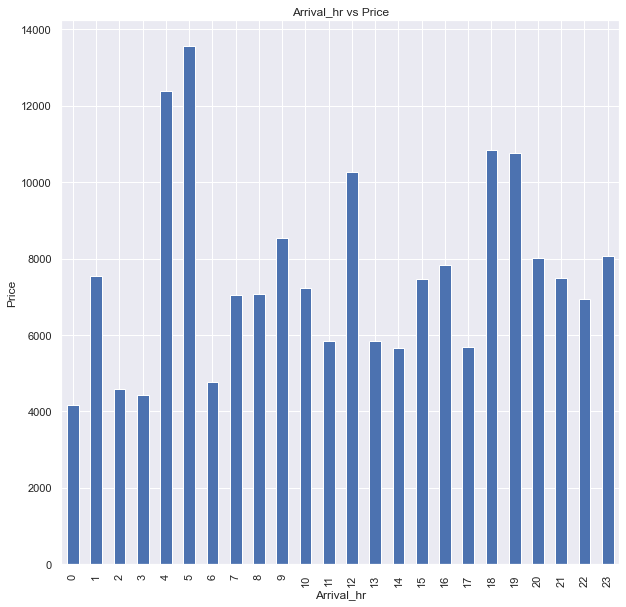

In [39]:
for feature in [feature for feature in discreate_features if feature not in ['dep_min', 'Arrival_min']]:
    data.groupby(feature)['Price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Price')
    #plt.xticks(rotation=45)
    plt.title("{} vs Price".format(feature))
    plt.show();

### Observations
1. As no. of stops increases the flight price increases.
2. All days have almost similar flight prices, the highest flight price on `6th` and least flight price on `27th` of the month.
2. Month of `March` has highest flight prices followed by `May and June`.
3. Month of `April` has least flight price.
4. `9 AM and 5 PM` departure time flights has highest flight price whereas `1 AM` departure time flights has least flight price.
5. `5 AM` Arrival time flights have highest flight prices, whereas `12 AM` Arrival time flights have least flight prices.

### 4.5 Visualising  Continuous features

### 4.5.1 Distribution of each continuous feature

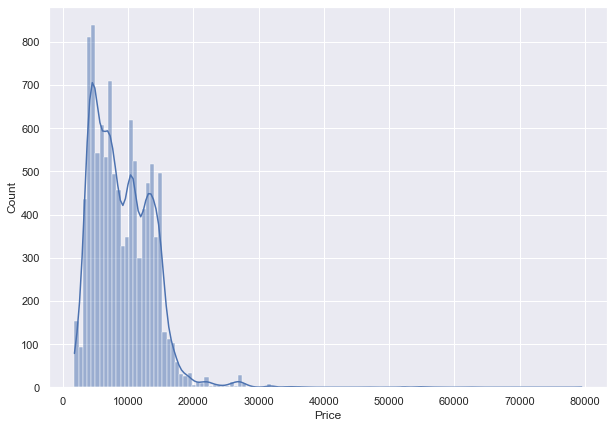

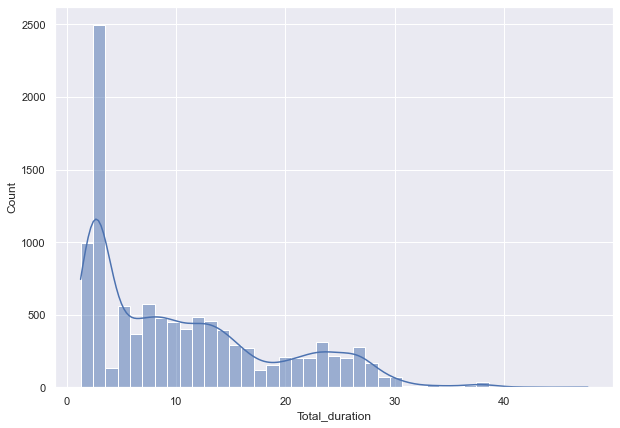

In [40]:
sns.set(rc={'figure.figsize':(10,7)})
for feature in continuous_feature:
    sns.histplot(data=data[feature], kde=True)
    plt.show()

### Observations
1. Flight prices has outliers and a left skewed distribution.
2. Total duration has also left skewed distribution.

### 4.5.2 Total duration vs Price with Airlines

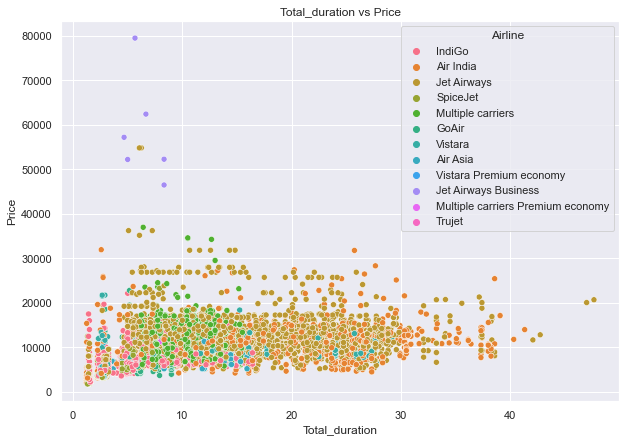

In [41]:
for feature in ['Total_duration']:
    sns.scatterplot(data=data, x=data[feature], y=data['Price'], hue='Airline')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.title("{} vs Price".format(feature))
    plt.show();

### Observations
1. Majority of flights have flight duration less than 30 hours.
2. Majority of flights have flight prices less than 20,000 INR.
3. Maximum flight price is 80,000 INR for Jet Airways Business Airline and flight duration is less than 10 hrs.
4. Maximum flight duration is more than 45 hrs for Jet airways flight.

### 4.5.3 Total duration vs Price with Stops

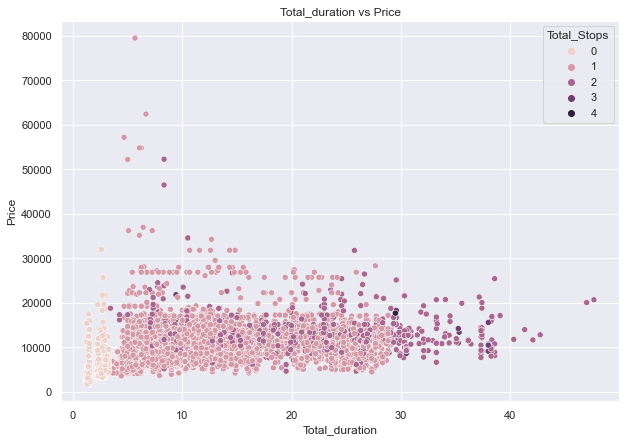

In [42]:
for feature in ['Total_duration']:
    sns.scatterplot(data=data, x=data[feature], y=data['Price'], hue='Total_Stops')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.title("{} vs Price".format(feature))
    plt.show();

### Observations
1. Flights having duration more than 30 hours have usually more than 2 stops.
2. Majority of flights have 1 stops, followed by no-stops.
3. Almost all flight duration less than 3 hours have no-stops.

## 5.0 Outliers

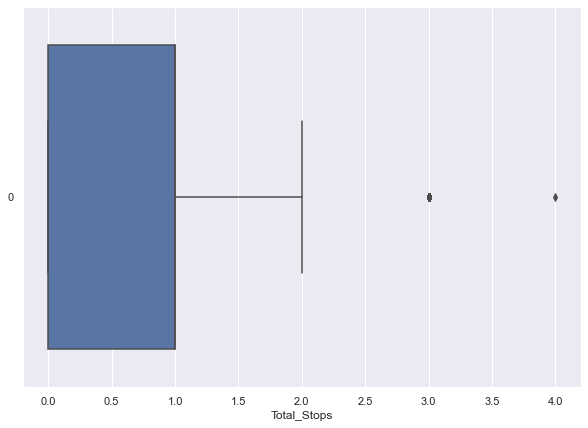

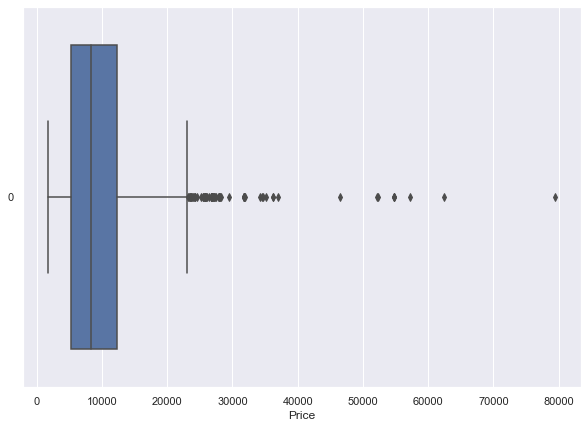

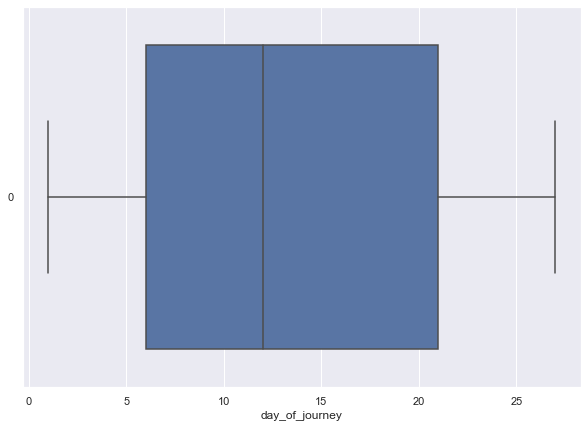

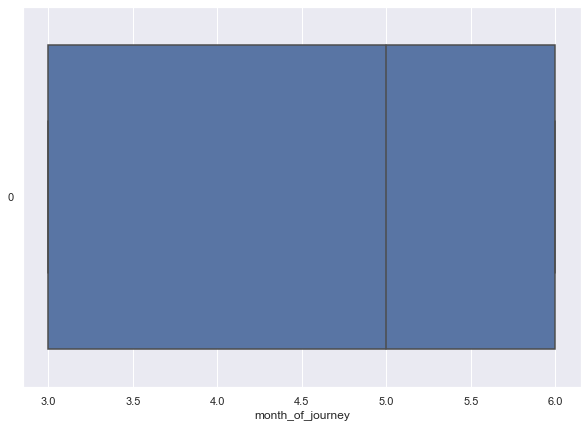

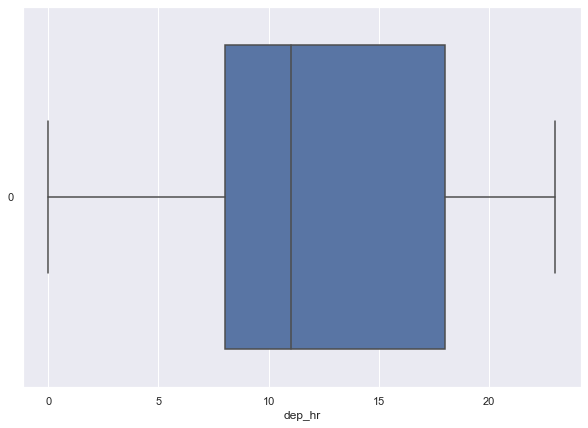

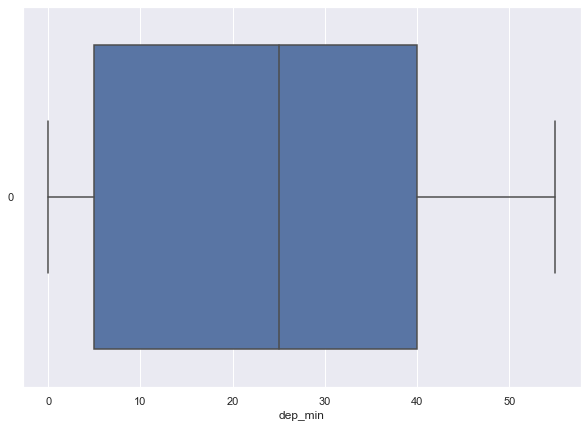

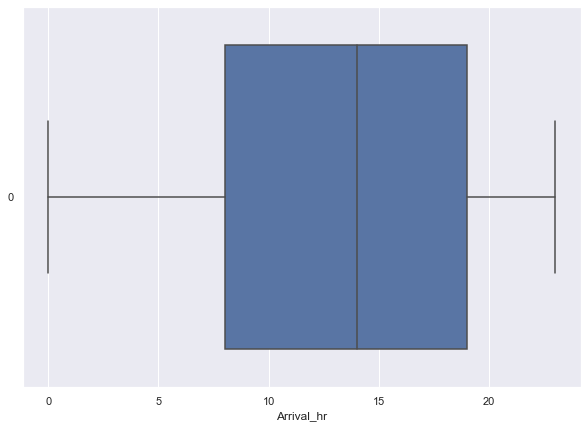

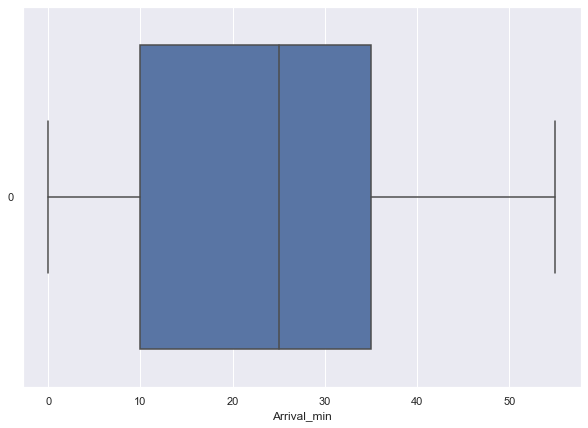

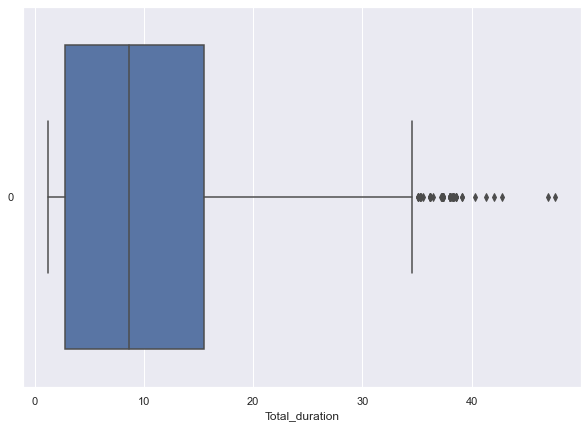

In [43]:
for feature in numerical_features:
    sns.boxplot(data=data[feature], orient='h')
    plt.xlabel(feature)
    plt.show();

### Observations
1. Total Stops, Price and Total Durations have outliers on upper bound side.
2. The No. of outliers are more in Price and total duration feature.

## 6.0 Visualising Temporal features with Price

In [51]:
data_temp=data[['day_of_journey', 'month_of_journey', 'dep_hr', 'Arrival_hr', 'Total_duration', 'Price']]
data_temp.head()

,day_of_journey,month_of_journey,dep_hr,Arrival_hr,Total_duration,Price
0,24,3,22,1,2.83,3897
1,1,5,5,13,7.42,7662
2,9,6,9,4,19.00,13882
3,12,5,18,23,5.42,6218
4,1,3,16,21,4.75,13302


### 6.1 Days vs Price

Text(0, 0.5, 'Price')

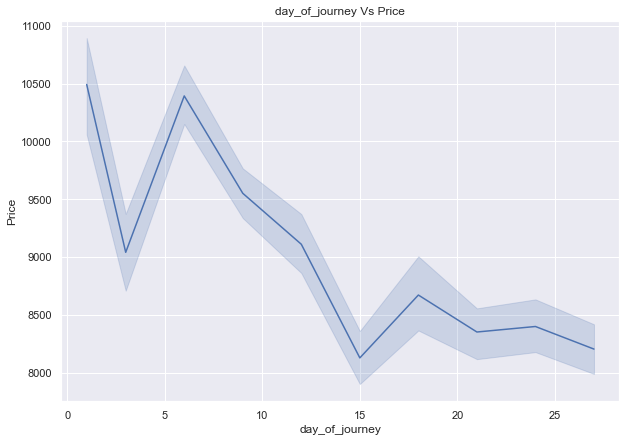

In [52]:
plt.figure(figsize=(10,7))
plt.title("day_of_journey Vs Price")
sns.lineplot(data=data_temp,x='day_of_journey', y='Price', estimator='mean')
plt.xlabel('day_of_journey')
plt.ylabel('Price')

### 6.2 Month vs Price

Text(0, 0.5, 'Price')

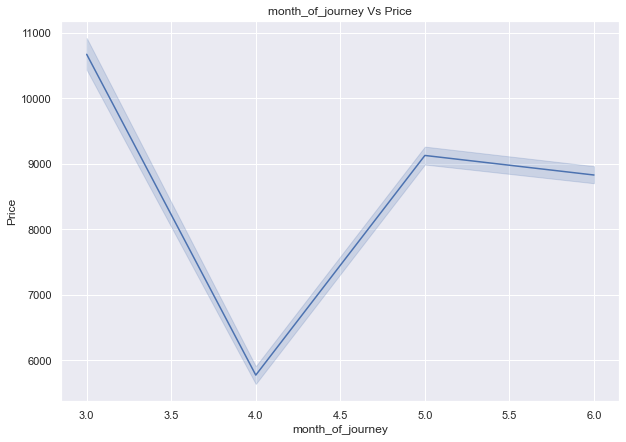

In [53]:
plt.figure(figsize=(10,7))
plt.title("month_of_journey Vs Price")
sns.lineplot(data=data_temp,x='month_of_journey', y='Price', estimator='mean')
plt.xlabel('month_of_journey')
plt.ylabel('Price')

### 6.3 Departure hour vs Price

Text(0, 0.5, 'Price')

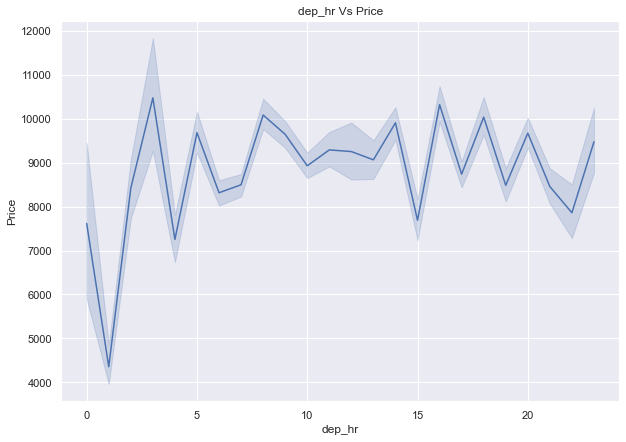

In [54]:
plt.figure(figsize=(10,7))
plt.title("dep_hr Vs Price")
sns.lineplot(data=data_temp,x='dep_hr', y='Price', estimator='mean')
plt.xlabel('dep_hr')
plt.ylabel('Price')

### 6.4 Arrival hour vs Price

Text(0, 0.5, 'Price')

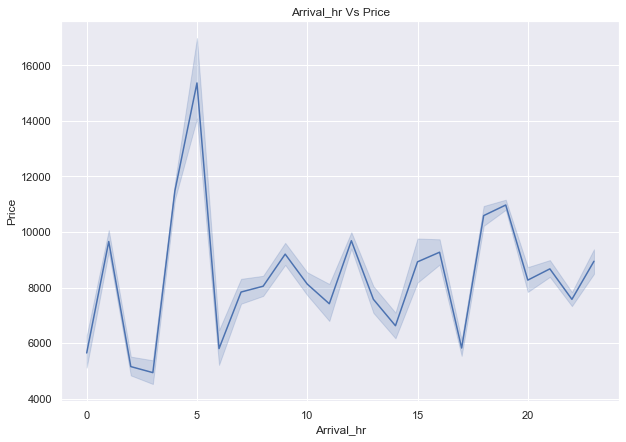

In [55]:
plt.figure(figsize=(10,7))
plt.title("Arrival_hr Vs Price")
sns.lineplot(data=data_temp,x='Arrival_hr', y='Price', estimator='mean')
plt.xlabel('Arrival_hr')
plt.ylabel('Price')

### 6.5 Total duration of flight vs Price

Text(0, 0.5, 'Price')

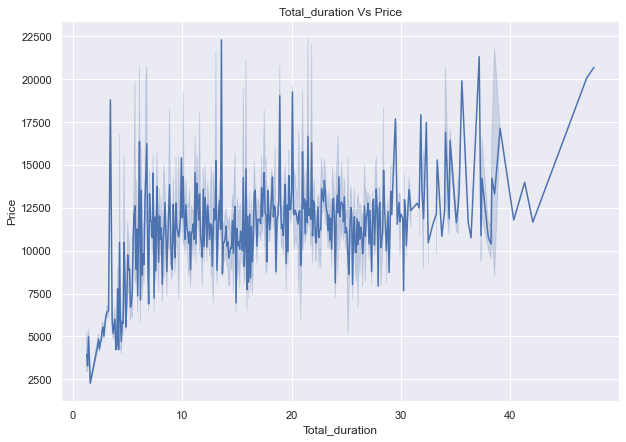

In [56]:
plt.figure(figsize=(10,7))
plt.title("Total_duration Vs Price")
sns.lineplot(data=data_temp,x='Total_duration', y='Price', estimator='mean')
plt.xlabel('Total_duration')
plt.ylabel('Price')

### Observations for Complete 6.0 heading
1. There is downward trend in flight price from first day to last day.
2. The only exception in above observation is that on 3rd the price decreases and on 6th the price increases.
3. From March to April and May to June there is decrease in flight price, whereas there is increase in flight price from April to May.
4. The flight price varies from 7,000 INR to 10,500 INR for departure hours. The only exception is 1 AM flight where flight price is close to 4,000 INR.
5. The flight price varies from 6,000 INR to 10,500 INR for Arrival hours. The only exception is 5 AM flight where flight price is close to 15,000 INR.
6. As total duration of flight increases the flight price also increases. There is a lot of fluctution in flight prices vs total duration data. This is due to continuous nature of duration data.

## 7.0 Correlation between Numerical features and Price and its Visualisation.

### 7.1 Discrete features vs Price

In [58]:
print(discreate_features)

['Total_Stops', 'day_of_journey', 'month_of_journey', 'dep_hr', 'dep_min', 'Arrival_hr', 'Arrival_min']


In [65]:
corr_discreate=round(data[discreate_features+['Total_duration','Price']].corr(),2)
corr_discreate

,Total_Stops,day_of_journey,month_of_journey,dep_hr,dep_min,Arrival_hr,Arrival_min,Total_duration,Price
Total_Stops,1.00,-0.01,0.05,-0.06,-0.00,0.04,-0.11,0.74,0.60
day_of_journey,-0.01,1.00,-0.04,0.00,-0.01,-0.00,-0.02,-0.02,-0.15
month_of_journey,0.05,-0.04,1.00,0.04,-0.06,-0.00,-0.10,0.01,-0.10
dep_hr,-0.06,0.00,0.04,1.00,-0.02,0.01,0.07,0.00,0.01
dep_min,-0.00,-0.01,-0.06,-0.02,1.00,0.04,-0.02,-0.02,-0.02
Arrival_hr,0.04,-0.00,-0.00,0.01,0.04,1.00,-0.15,0.05,0.02
Arrival_min,-0.11,-0.02,-0.10,0.07,-0.02,-0.15,1.00,-0.07,-0.09
Total_duration,0.74,-0.02,0.01,0.00,-0.02,0.05,-0.07,1.00,0.51
Price,0.60,-0.15,-0.10,0.01,-0.02,0.02,-0.09,0.51,1.00


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 [Text(0.5, 0, 'Total_Stops'),
  Text(1.5, 0, 'day_of_journey'),
  Text(2.5, 0, 'month_of_journey'),
  Text(3.5, 0, 'dep_hr'),
  Text(4.5, 0, 'dep_min'),
  Text(5.5, 0, 'Arrival_hr'),
  Text(6.5, 0, 'Arrival_min'),
  Text(7.5, 0, 'Total_duration'),
  Text(8.5, 0, 'Price')])

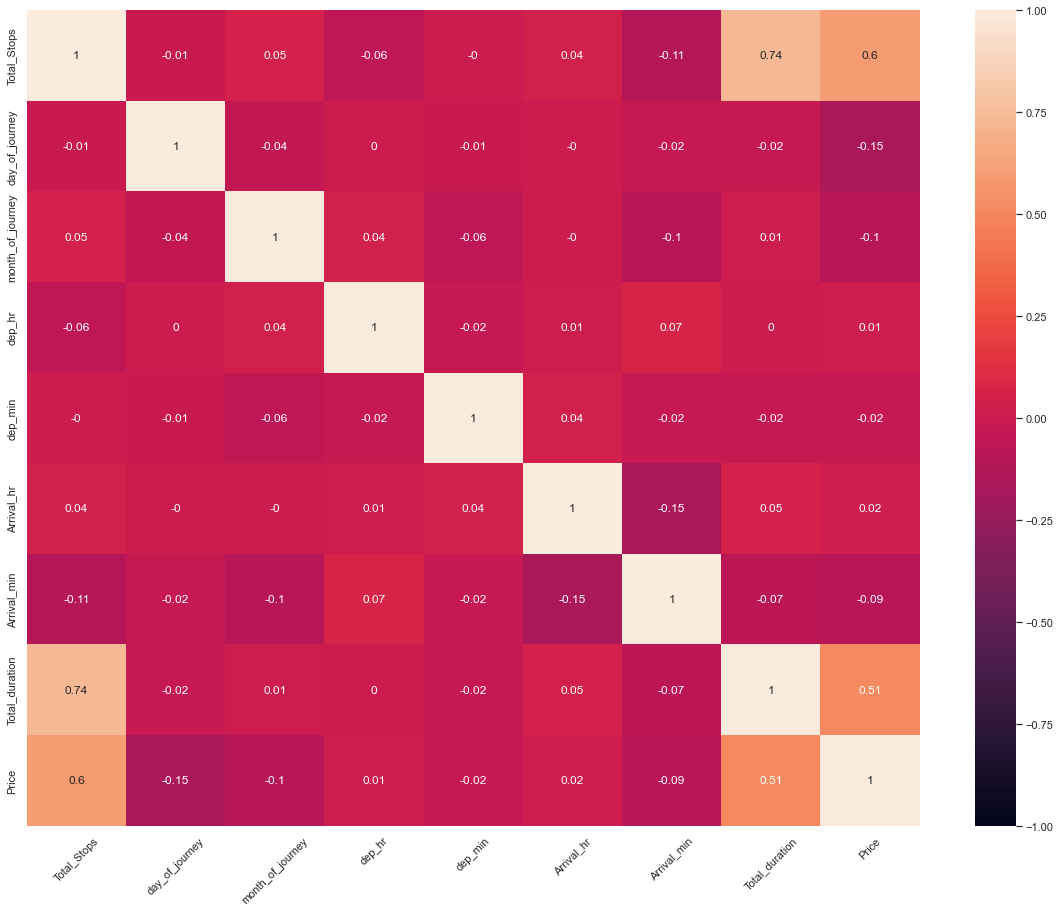

In [66]:
plt.figure(figsize=(20,15))
sns.heatmap(data=corr_discreate,annot=True,  vmin=-1, vmax=1)
plt.xticks(rotation=45)

### Note (For both positive and negative side)
1. Correlation coefficients between 0.9 and 1.0,  very highly correlated. 
2. Correlation coefficients between 0.7 and 0.9,  highly correlated. 
3. Correlation coefficients between 0.5 and 0.7,  moderately correlated. 
4. Correlation coefficients between 0.3 and 0.5,  low correlation. 
5. Correlation coefficients less than 0.3, little correlation.

In [64]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Price', 'day_of_journey', 'month_of_journey',
       'dep_hr', 'dep_min', 'Arrival_hr', 'Arrival_min', 'Total_duration'],
      dtype='object')

### Observations
1. Total_steps is moderately correlated with Price feature
2. day_of_journey, month_of_journey, dep_hr, Arrival_hr have little correlation with Price feature.
3. All independent feature have little correlation (i.e. <0.3) with each other. This implies that there is no Multicollinearity present in data set.
4. Total Duration is highly correalted with Total Steps.

### 7.2 Continuous features vs Price

In [61]:
continuous_feature

['Price', 'Total_duration']

In [62]:
corr_continuous=round(data[continuous_feature].corr(),2)
corr_continuous

,Price,Total_duration
Price,1.00,0.51
Total_duration,0.51,1.00


(array([0.5, 1.5]), [Text(0.5, 0, 'Price'), Text(1.5, 0, 'Total_duration')])

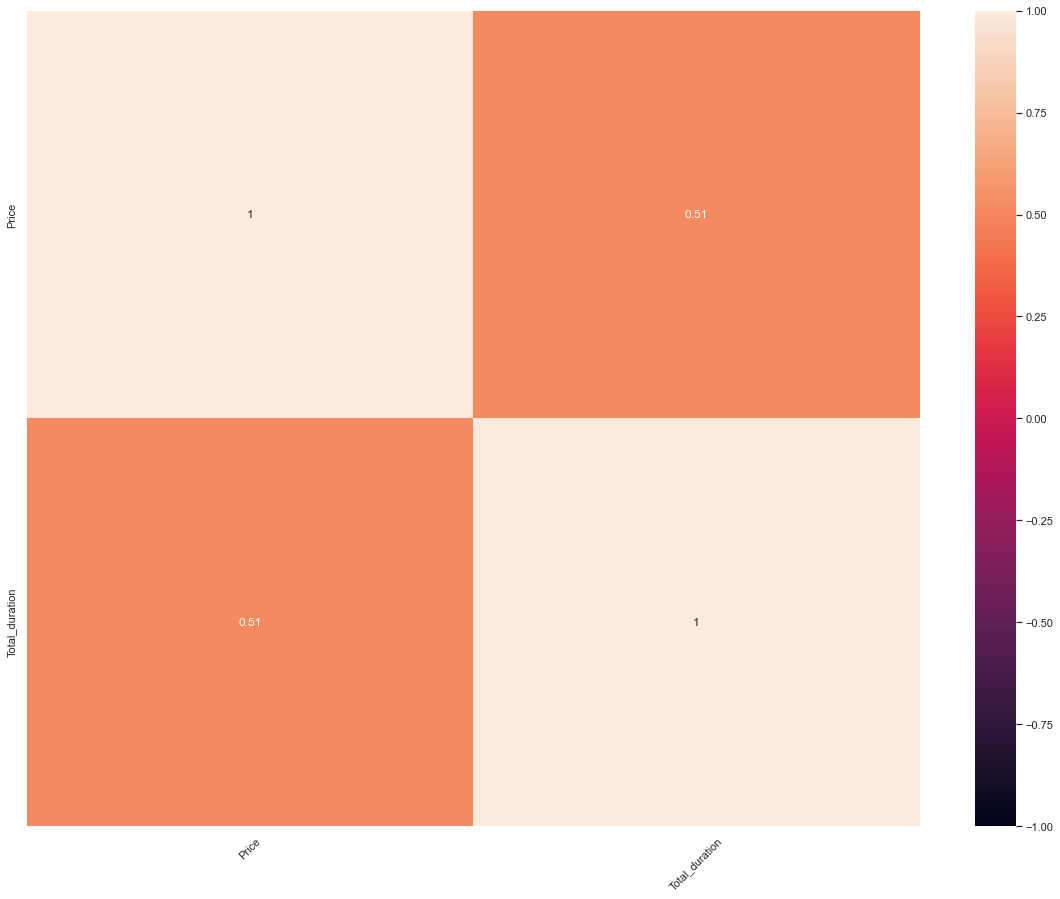

In [63]:
plt.figure(figsize=(20,15))
sns.heatmap(data=corr_continuous,annot=True,  vmin=-1, vmax=1)
plt.xticks(rotation=45)

### Observations
1. Total duration is moderately correlated with Price feature.